# Preparing Cover Picture, Graphical Abstract and TOC Image based on NLP

**Task:** Based on the term frequency of words in an  article or in a book, plotting word cloud to be used as cover picture, graphical abstract, TOC Image, etc.

**Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')
from nltk.corpus import stopwords
from textblob import Word
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

**Loading the Data File**

The text to be analyzed copied from: https://pubs.acs.org/doi/10.1021/acs.jctc.0c00344

In [2]:
data = pd.read_csv("PNO_Extrapolation.txt",sep = "\t")
data.columns= ["words"]
df = data.copy()
df

,words
0,Extrapolation to the Limit of a Complete Pair ...
1,"Ahmet Altun, Frank Neese, Giovanni Bistoni"
2,"Max-Planck-Institut für Kohlenforschung, Kaise..."
3,ABSTRACT
4,The domain-based local pair natural orbital co...
...,...
116,"(40) Zhao, Y.; Ng, H. T.; Peverati, R.; Truhla..."
117,"(41) Rezác, J.; Riley, K. E.; Hobza, P. S66: A..."
118,"(42) Kesharwani, M. K.; Karton, A.; Sylvetsky,..."
119,"(43) Altun, A.; Neese, F.; Bistoni, G. HFLD: A..."


**Upper Case to Lower Cose Transformation**

In [3]:
df["words"] = df["words"].apply(lambda x: " ".join(x.lower() for x in x.split()))

**Removing Punctuation**

In [4]:
df["words"] = df["words"].str.replace('[^\w\s]','')

**Removing Numbers**

In [5]:
df["words"] = df["words"].str.replace('\d','')

**Removing Stopwords**

In [6]:
sw = stopwords.words('english')
df["words"] = df["words"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

**Removing Rare Counts**

In [7]:
del_rare = pd.Series(' '.join(df["words"]).split()).value_counts()[-10:]
df["words"] = df["words"].apply(lambda x: " ".join(x for x in x.split() if x not in del_rare))

**Removing Single and Two Letter Counts**

In [8]:
df["words"] = df["words"].apply(lambda x: " ".join(x for x in x.split() if len(x) > 2))

In [9]:
df

,words
0,extrapolation limit complete pair natural orbi...
1,ahmet altun frank neese giovanni bistoni
2,maxplanckinstitut für kohlenforschung kaiserwi...
3,abstract
4,domainbased local pair natural orbital coupled...
...,...
116,zhao peverati truhlar benchmark database ylidi...
117,rezác riley hobza wellbalanced database benchm...
118,kesharwani karton sylvetsky martin noncovalent...
119,altun neese bistoni hfld nonempirical london d...


**Lemmatization**

In [10]:
df["words"] = df["words"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

In [11]:
df

,words
0,extrapolation limit complete pair natural orbi...
1,ahmet altun frank neese giovanni bistoni
2,maxplanckinstitut für kohlenforschung kaiserwi...
3,abstract
4,domainbased local pair natural orbital coupled...
...,...
116,zhao peverati truhlar benchmark database ylidi...
117,rezác riley hobza wellbalanced database benchm...
118,kesharwani karton sylvetsky martin noncovalent...
119,altun neese bistoni hfld nonempirical london d...


**Plotting Term Frequencies**

In [12]:
df_tf= df["words"].str.split(" ", expand=True).melt()['value'].value_counts().reset_index()
df_tf.columns= ["words", "tf"]
df_tf

,words,tf
0,tcutpno,100
1,set,76
2,energy,76
3,extrapolation,75
4,calculation,59
...,...,...
859,ed,1
860,forschungsgemeinschaft,1
861,otherwise,1
862,blue,1


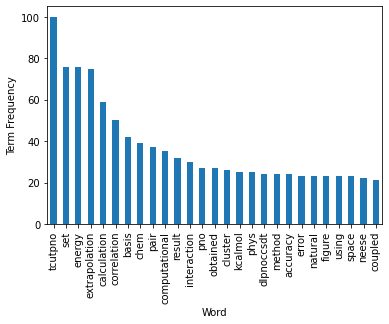

In [13]:
filter = df_tf[df_tf["tf"] > 20]
filter.plot.bar(x = "words", y = "tf", xlabel = "Word", ylabel = "Term Frequency", legend = None);

**Word Cloud**

In [14]:
text = " ".join(i for i in df.words)

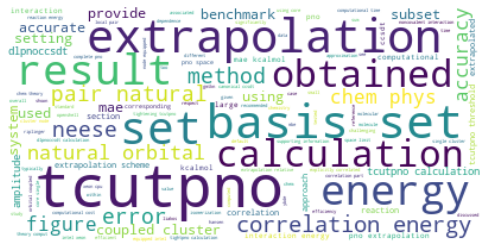

In [15]:
wordcloud = WordCloud(max_font_size = 50, 
                     random_state = 1,                      
                     background_color = "white").generate(text)
plt.figure(figsize = [8.5,8.5])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [16]:
wordcloud.to_file("Word_Cloud.png");

**Word Cloud on a Background Figure**

In [17]:
dlpno_mask = np.array(Image.open("CPS.tif"))

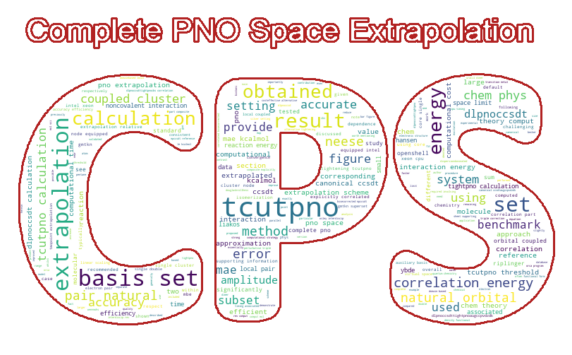

In [18]:
wordcloud = WordCloud(background_color = "white",
                     max_words = 1000, 
                     mask = dlpno_mask, 
                     contour_width = 3,
                     random_state = 1,
                     contour_color = "firebrick")

wordcloud.generate(text)

wordcloud.to_file("CPS_wc.tif")

plt.figure(figsize = [10,10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()